The price of bread is ~1\$ and gets you ~2500 calories that's ~2kWh/\$  
Coal can produce MWh in the price of ~100\$, that's 10kWh/\$  
That's not a big difference actually.  

But food is not the main expense  
The main expense is the house  

What now?
It's pretty difficult to write hebrew with latin characters.
But I guess I can try

In [26]:
money_to_freedom = 375000
money_per_year = 50000
years_to_freedom = money_to_freedom/money_per_year
months_to_freedom = years_to_freedom*12
years_to_freedom


7.5

In [15]:
money_per_day = money_per_month/20
money_per_hour = money_per_day/10
money_per_hour

20.0

I need this freedom...
That's all I care about...
How do I get there faster?  
I can work as an uber driver, get ~8000\$ for 200 hour so ~40\$/hr  
Out of which I keep ~25\$  
If I work another 40 hours a month, I take it down to 6.25 years


If I earn 6% interest a year
year_1 = 50000
year_2 = year1\*1.06+50000
year_N = year_N-1\*1.06 + 50000 = sum(year_1\*1.06\*\*i) = year_1\*sum(1.06\*\*i)=year_1\*(1.06\*\*i-1)/(1.06-1)

In [43]:
def year(n, i=1.06, s=50000): return s * (i**(n+1)-1)/(i-1)
year(5.4)

376641.37259596353

If I need t\$ a year to retire, and I save s\$ every year, and I get i% on my money  
The sum I need to reach T = t/(i-1)  
And the sum each year is s \* (i\*\*N-1)/(i-1)  
If I want them to be equal  
t/s=(i\*\*N-1)  
t/s+1 = i\*\*N  
log(t/s+1) = N\*log(i)  
N = log(t/s+1)/log(i)

In [43]:
import numpy as np
def years(tts, i, stt0=None, out=float): return out(np.log(tts+1)/np.log(i+1) - years(stt0*i, i, out=out))\
                                                if stt0 else out(np.log(tts+1)/np.log(i+1))
def total(n, s, i): s*((1+i)**n-1)/i
years(1, .08) - years(1, .08, 125/50)

2.369011048998998

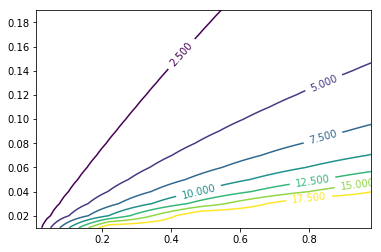

In [15]:
import matplotlib.pyplot as plt
def plot_years():
    x = np.array([tts/100 for tts in range(1,99)])
    y = np.array([i/100 for i in range(1, 20)])
    a = np.array([[years(tts, i) for tts in x] for i in y])
    MAX_YEARS = 20
    a[a > MAX_YEARS] = MAX_YEARS
    CS = plt.contour(x, y, a)
    plt.clabel(CS, inline=1, fontsize=10)
    # plt.matshow(a, interpolation='nearest')#, extent=[1, 20, 1, 20])
    # plt.xticks(range(1,20), [tts/10 for tts in range(20,1,-1)])
    # plt.yticks(range(1,20), [i/100 for i in range(20,1,-1)])
    # plt.yticks(range(1,20), 'i')
    plt.show()
plot_years()

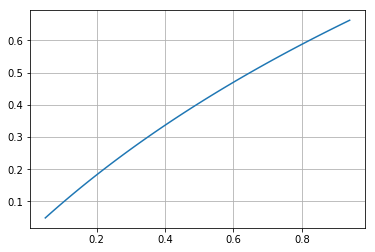

In [10]:
a1 = [np.log(1+tts) for tts in x]
plt.plot(x, a1)
plt.grid(True)
plt.show()

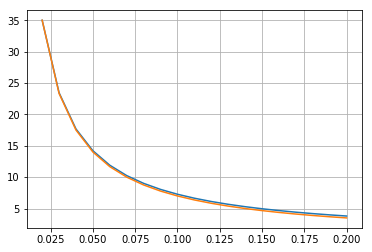

In [47]:
a = np.array([years(1, i) for i in y])
a2 = np.array([0.7/i for i in y])
plt.plot(y, a)
plt.plot(y, a2)
plt.grid(True)
plt.show()

In general the saving rate is subliniar, and the interest is more liniar (closer to 1)  
So all in all interest affects the number more 
If the saving rate around 2, then log(2)=~0.7  
I can use log rules:
* If I increase it by 10% then it's ``log(2.1)=log(2*1.05)=log(2)+log(1.05)~=log(2)+0.05``
* If I double it then ``log(3)=log(2*1.5)=log(2)+log(1.5)``
* If I triple ``log(4)=log(2^2)=2log(2)``
* If I decrease 10% ``log(1.9)=log(2*0.95)=log(2)-log(1-0.05)~=log(2)-0.05``
* If it's half ``log(1.5)=log(2*3/4)=log(2)-log(1-0.25)``
* If it's 56% les ``log(1.44)=log(2^0.5)=0.5log(2)``  

Increasing by 10% means ``t/s=1.1=t/(income-t) -> 1.1*income=2.1t -> t = 1.1/2.1*income ~= 10.5/20 income``  
If ``t/s=0.5 -> 0.5(income-t)=t -> income*0.5/1.5=income/3=t``

log(1+t/(1-t))=log(1/(1-t))=-log(1-t)
log(1+(1-s)/s)=log(1/s)=-log(s)

In [4]:
import numpy as np
def years(t, i, s0=None, out=float): return out(-np.log(1-t)/np.log(1+i) - years_done(s0, i) \
                                                if s0 else -np.log(1-t)/np.log(1+i))
def total(n, s, i): return s*((1+i)**n-1)/i
def years_done(s0, i): return(-np.log(1-s0*i/(1+s0*i))/np.log(1+i))
years(0.5, .14, 2.5)
# years(.5, .08)
# total(2.9, 50, 0.08)


2.9996779388749384

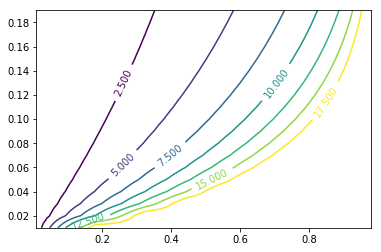

In [17]:
plot_years()